<a href="https://colab.research.google.com/github/Inyrkz/IoT-Intrusion-Detection/blob/main/IoT_ML_with_Ton_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Downloading ToN_IoT Datasets

In [ ]:
# Download Dataset
import requests

def download_dataset(url, file_name):
  '''function to download dataset from url
  args
  url: str, download link
  file_name: str, name of the file
  '''
  r = requests.get(url, allow_redirects=True)
  open(file_name, 'wb').write(r.content)

    
download_dataset('https://cloudstor.aarnet.edu.au/plus/s/ds5zW91vdgjEj9i/download?path=%2FTrain_Test_datasets%2FTrain_Test_Network_dataset&files=Train_Test_Network.csv&downloadStartSecret=ohroysxk3vq', 'Train_Test_Network.csv')

### Load Datasets

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv("/content/Train_Test_Network.csv")
dataset

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_query,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,ssl_cipher,ssl_resumed,ssl_established,ssl_subject,ssl_issuer,http_trans_depth,http_method,http_uri,http_version,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,1554198358,3.122.49.24,1883,192.168.1.152,52976,tcp,-,80549.530260,1762852,41933215,OTH,0,252181,14911156,2,236,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
1,1554198358,192.168.1.79,47260,192.168.1.255,15600,udp,-,0.000000,0,0,S0,0,1,63,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,0,normal
2,1554198359,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.000000,0,0,OTH,0,0,0,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
3,1554198359,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,OTH,0,0,0,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,0,normal
4,1554198362,192.168.1.152,46608,192.168.1.190,53,udp,dns,0.000549,0,298,SHR,0,0,0,2,354,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,bad_UDP_checksum,-,F,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461038,1556340862,192.168.1.32,33108,176.28.50.165,80,tcp,-,0.000000,0,0,S0,0,1,60,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,1,xss
461039,1556423390,192.168.1.33,37242,34.230.157.88,443,tcp,-,0.000000,0,0,OTH,0,0,0,1,103,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,1,ransomware
461040,1556436603,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,OTH,0,108,108064,31,3832,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,1,backdoor
461041,1556540442,192.168.1.31,60816,104.98.29.100,443,tcp,-,23.190902,32,31,SF,0,8,411,7,395,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,1,mitm


In [ ]:
dataset.tail(30)

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,missed_bytes,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,dns_query,dns_qclass,dns_qtype,dns_rcode,dns_AA,dns_RD,dns_RA,dns_rejected,ssl_version,ssl_cipher,ssl_resumed,ssl_established,ssl_subject,ssl_issuer,http_trans_depth,http_method,http_uri,http_version,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
461013,1556548505,192.168.1.34,54682,192.168.1.1,53,udp,dns,0.014698,168,424,SF,0,4,280,2,480,detectportal.firefox.com,1,1,0,F,T,T,F,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,1,mitm
461014,1556548535,192.168.1.34,5,192.168.1.1,1,icmp,-,0.000008,142,0,OTH,0,2,198,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,1,mitm
461015,1556548547,192.168.1.34,5,192.168.1.195,1,icmp,-,69.437811,1157,0,OTH,0,20,1717,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,1,mitm
461016,1556548635,192.168.1.34,11,40.90.189.152,0,icmp,-,4.847478,624,0,OTH,0,12,960,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,1,mitm
461017,1556548639,192.168.1.34,11,192.168.1.169,0,icmp,-,0.000005,104,0,OTH,0,2,160,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,1,mitm
461018,1556548639,192.168.1.34,5,192.168.1.169,1,icmp,-,0.100696,184,0,OTH,0,4,296,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,1,mitm
461019,1556548656,192.168.1.34,11,172.217.25.162,0,icmp,-,0.000006,172,0,OTH,0,2,228,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,1,mitm
461020,1556548974,192.168.1.34,11,216.58.196.142,0,icmp,-,161.321285,10054,0,OTH,0,200,15654,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,1,mitm
461021,1556548974,192.168.1.34,11,74.125.109.8,0,icmp,-,181.342566,34694,0,OTH,0,210,40574,0,0,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,1,mitm
461022,1556548982,192.168.1.34,54116,101.119.11.11,80,tcp,-,117.968340,288,384,SF,0,15,1068,12,1008,-,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,-,-,-,-,-,-,1,mitm


In [ ]:
dataset.shape

(461043, 45)

In [ ]:
# list all dataset columns
print("Full Dataset Columns", dataset.columns, sep='\n',
      end='\n\n')
print("Unique values in the 'category' column", 
      dataset['type'].unique(), sep='\n')

Full Dataset Columns
Index(['ts', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'proto', 'service',
       'duration', 'src_bytes', 'dst_bytes', 'conn_state', 'missed_bytes',
       'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'dns_query',
       'dns_qclass', 'dns_qtype', 'dns_rcode', 'dns_AA', 'dns_RD', 'dns_RA',
       'dns_rejected', 'ssl_version', 'ssl_cipher', 'ssl_resumed',
       'ssl_established', 'ssl_subject', 'ssl_issuer', 'http_trans_depth',
       'http_method', 'http_uri', 'http_version', 'http_request_body_len',
       'http_response_body_len', 'http_status_code', 'http_user_agent',
       'http_orig_mime_types', 'http_resp_mime_types', 'weird_name',
       'weird_addl', 'weird_notice', 'label', 'type'],
      dtype='object')

Unique values in the 'category' column
['normal' 'scanning' 'dos' 'injection' 'ddos' 'password' 'xss'
 'ransomware' 'backdoor' 'mitm']


### Feature Extraction

In [ ]:
# the features I want to use for prototyping
trial_features = ['proto', 'duration', 'src_bytes', 'dst_bytes',
                  'conn_state', 'missed_bytes', 'src_pkts', 'src_ip_bytes',
                  'dst_pkts', 'dst_ip_bytes', 'dns_qclass', 'dns_qtype',
                  'dns_rcode', 'type']

subset_dataset =  dataset[trial_features]
print(subset_dataset)

       proto      duration  src_bytes  ...  dns_qtype dns_rcode        type
0        tcp  80549.530260    1762852  ...          0         0      normal
1        udp      0.000000          0  ...          0         0      normal
2        tcp      0.000000          0  ...          0         0      normal
3        tcp      0.000000          0  ...          0         0      normal
4        udp      0.000549          0  ...          0         0      normal
...      ...           ...        ...  ...        ...       ...         ...
461038   tcp      0.000000          0  ...          0         0         xss
461039   tcp      0.000000          0  ...          0         0  ransomware
461040   tcp    290.371539     101568  ...          0         0    backdoor
461041   tcp     23.190902         32  ...          0         0        mitm
461042   tcp     22.872314         32  ...          0         0        mitm

[461043 rows x 14 columns]


normal        300000
scanning       20000
ddos           20000
injection      20000
ransomware     20000
xss            20000
backdoor       20000
password       20000
dos            20000
mitm            1043
Name: type, dtype: int64


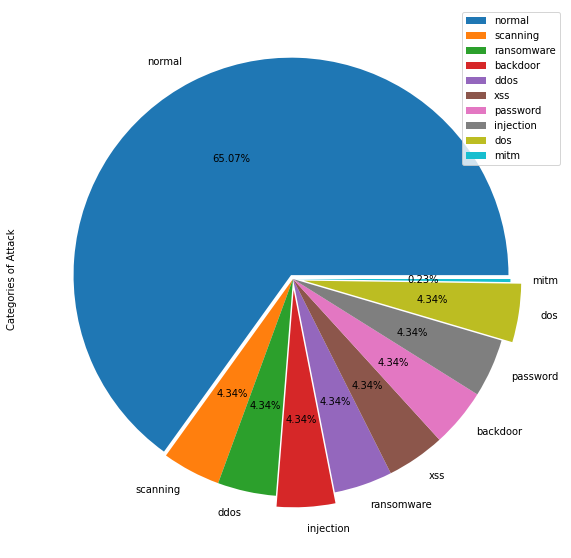

In [ ]:
# check the number of unique values in the target variable
print(subset_dataset['type'].value_counts())
subset_dataset['type'].value_counts().plot(kind = 'pie',
                                           explode = [0.02, 0, 0, 0.05, 0, 0,
                                                      0, 0, 0.05, 0],
                                           figsize = (10, 10),
                                           autopct = '%1.2f%%',
                                           shadow = False)
plt.ylabel("Categories of Attack")
plt.legend(['normal', 'scanning', 'ransomware', 'backdoor', 'ddos', 'xss',
            'password', 'injection', 'dos', 'mitm'])
plt.show()

In [ ]:
# check the data type of dataframe columns
subset_dataset.dtypes

proto            object
duration        float64
src_bytes         int64
dst_bytes         int64
conn_state       object
missed_bytes      int64
src_pkts          int64
src_ip_bytes      int64
dst_pkts          int64
dst_ip_bytes      int64
dns_qclass        int64
dns_qtype         int64
dns_rcode         int64
type             object
dtype: object

In [ ]:
# check for missing values
# subset_dataset[subset_dataset.isnull().any(axis=1)]
subset_dataset.isnull().any(axis=1)

0         False
1         False
2         False
3         False
4         False
          ...  
461038    False
461039    False
461040    False
461041    False
461042    False
Length: 461043, dtype: bool

In [ ]:
# Split Data into Features and Target variables
X = subset_dataset.iloc[:, :-1].values
y = subset_dataset.type
print(X)
print(y)
print(X.shape)

[['tcp' 80549.53026 1762852 ... 0 0 0]
 ['udp' 0.0 0 ... 0 0 0]
 ['tcp' 0.0 0 ... 0 0 0]
 ...
 ['tcp' 290.37153900000004 101568 ... 0 0 0]
 ['tcp' 23.190901999999998 32 ... 0 0 0]
 ['tcp' 22.872314000000003 32 ... 0 0 0]]
0             normal
1             normal
2             normal
3             normal
4             normal
             ...    
461038           xss
461039    ransomware
461040      backdoor
461041          mitm
461042          mitm
Name: type, Length: 461043, dtype: object
(461043, 13)


# One-Hot Encode Categorical Variables

In [ ]:
# Handling Categorical Data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('enconder', OneHotEncoder(), [0, 4])], remainder='passthrough')
encoded_X = np.array(ct.fit_transform(X))
encoded_X[:,:12]

array([[0.0, 1.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 1.0, ..., 1.0, 0.0, 0.0],
       [0.0, 1.0, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       [0.0, 1.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 1.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 1.0, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [ ]:
# np.set_printoptions(threshold=np.inf)

# print(encoded_X)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(encoded_X.shape)

(461043, 27)


### Label Encode the target variable

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                     label_encoder.transform(label_encoder.classes_)))
print("Mapping of Label Encoded Classes", label_encoder_name_mapping, sep="\n")

Mapping of Label Encoded Classes
{'backdoor': 0, 'ddos': 1, 'dos': 2, 'injection': 3, 'mitm': 4, 'normal': 5, 'password': 6, 'ransomware': 7, 'scanning': 8, 'xss': 9}


In [ ]:
# Splitting Dataset into Training and Validation Set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(encoded_X, encoded_y, test_size=0.25,
                                                  random_state=0, 
                                                  stratify=encoded_y)

print('X Training set', X_train, sep='\n')
print('X Validation set', X_val, sep='\n')
print('y Training set', y_val, sep='\n')
print('y Validation set', y_val, sep='\n')

X Training set
[[0.0 1.0 0.0 ... 0 0 0]
 [0.0 1.0 0.0 ... 0 0 0]
 [0.0 1.0 0.0 ... 0 0 0]
 ...
 [0.0 1.0 0.0 ... 0 0 0]
 [0.0 0.0 1.0 ... 0 0 0]
 [0.0 0.0 1.0 ... 0 0 0]]
X Validation set
[[1.0 0.0 0.0 ... 0 0 0]
 [0.0 0.0 1.0 ... 1 12 3]
 [0.0 1.0 0.0 ... 0 0 0]
 ...
 [0.0 1.0 0.0 ... 0 0 0]
 [0.0 0.0 1.0 ... 0 0 0]
 [0.0 1.0 0.0 ... 0 0 0]]
y Training set
[5 5 5 ... 5 5 8]
y Validation set
[5 5 5 ... 5 5 8]


### Feature Scaling

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
print(scaled_X_train)
print(scaled_X_val)
print(len(scaled_X_train))
print(len(scaled_X_val))

[[-0.11437518  0.79658979 -0.77509256 ... -0.06507761 -0.20325657
  -0.16153532]
 [-0.11437518  0.79658979 -0.77509256 ... -0.06507761 -0.20325657
  -0.16153532]
 [-0.11437518  0.79658979 -0.77509256 ... -0.06507761 -0.20325657
  -0.16153532]
 ...
 [-0.11437518  0.79658979 -0.77509256 ... -0.06507761 -0.20325657
  -0.16153532]
 [-0.11437518 -1.25535126  1.29016849 ... -0.06507761 -0.20325657
  -0.16153532]
 [-0.11437518 -1.25535126  1.29016849 ... -0.06507761 -0.20325657
  -0.16153532]]
[[ 8.74315602 -1.25535126 -0.77509256 ... -0.06507761 -0.20325657
  -0.16153532]
 [-0.11437518 -1.25535126  1.29016849 ... -0.06460601  0.22965939
   5.65558671]
 [-0.11437518  0.79658979 -0.77509256 ... -0.06507761 -0.20325657
  -0.16153532]
 ...
 [-0.11437518  0.79658979 -0.77509256 ... -0.06507761 -0.20325657
  -0.16153532]
 [-0.11437518 -1.25535126  1.29016849 ... -0.06507761 -0.20325657
  -0.16153532]
 [-0.11437518  0.79658979 -0.77509256 ... -0.06507761 -0.20325657
  -0.16153532]]
345782
115261


### Train Model

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

def evaluate_model(y_val, y_pred):
  """Function to evaluate model and return the metric of the model
  
  It returns a dictionary with the classification metrics.
  """
  accuracy = accuracy_score(y_val, y_pred)
  precision = precision_score(y_val, y_pred, average='macro')
  recall = recall_score(y_val, y_pred, average='macro')
  f1 = f1_score(y_val, y_pred, average='macro')
  result = {"accuracy_score": accuracy,
            "precision_score": precision,
            "recall_score": recall,
            "f1_score": f1}
  return result

def plot_confusion_matrix(y_val, y_pred, label):
  '''function to plot confusion matrix

  Args
  y_val: array. The validation set of the target variable.
  y_pred: array. Model's prediction.
  label: list. A list containing all the classes in the target variable

  Returns
  It returns a plot of the confusion matrix
  '''
  cm = confusion_matrix(y_val, y_pred)
  fig, ax = plt.subplots(figsize=(10,10))
  ConfusionMatrixDisplay(cm, display_labels=label).plot(ax=ax, values_format='', xticks_rotation='vertical')

# class labels
label = ['backdoor', 'ddos', 'dos', 'injection', 'mitm', 'normal', 'password', 'ransomware', 'scanning', 'xss']

### Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy_score': 0.7674495275938956, 'precision_score': 0.5773948430495188, 'recall_score': 0.4399613333333333, 'f1_score': 0.3936017166366333}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.44      0.99      0.61      5000
           1       0.69      0.92      0.79      5000
           2       0.73      0.07      0.13      5000
           3       0.73      0.02      0.05      5000
           4       0.00      0.00      0.00       261
           5       0.84      0.95      0.89     75000
           6       0.19      0.02      0.03      5000
           7       0.89      0.07      0.13      5000
           8       0.67      0.77      0.71      5000
           9       0.60      0.59      0.60      5000

    accuracy                           0.77    115261
   macro avg       0.58      0.44      0.39    115261
weighted avg       0.76      0.77      0.71    115261



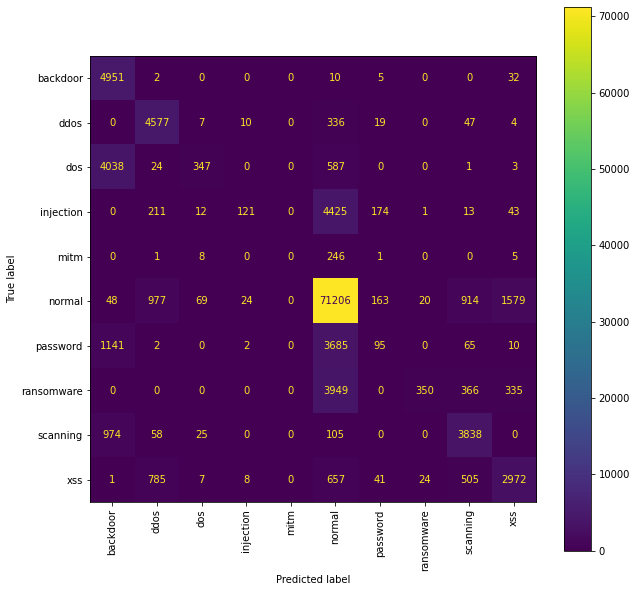

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(max_iter=3000)
logistic_regression_model.fit(scaled_X_train, y_train)
logistic_regression_y_pred = logistic_regression_model.predict(scaled_X_val)
print(evaluate_model(y_val, logistic_regression_y_pred))
plot_confusion_matrix(y_val, logistic_regression_y_pred, label)
print(classification_report(y_val, logistic_regression_y_pred))

### KNN Algorithm

{'accuracy_score': 0.9763146250683232, 'precision_score': 0.9139897610275718, 'recall_score': 0.9233031724137932, 'f1_score': 0.9181335854627442}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       0.97      0.97      0.97      5000
           2       0.98      0.98      0.98      5000
           3       0.97      0.96      0.97      5000
           4       0.59      0.56      0.57       261
           5       1.00      0.99      0.99     75000
           6       0.86      0.99      0.92      5000
           7       0.86      0.90      0.88      5000
           8       0.99      0.99      0.99      5000
           9       0.93      0.91      0.92      5000

    accuracy                           0.98    115261
   macro avg       0.91      0.92      0.92    115261
weighted avg       0.98      0.98      0.98    115261



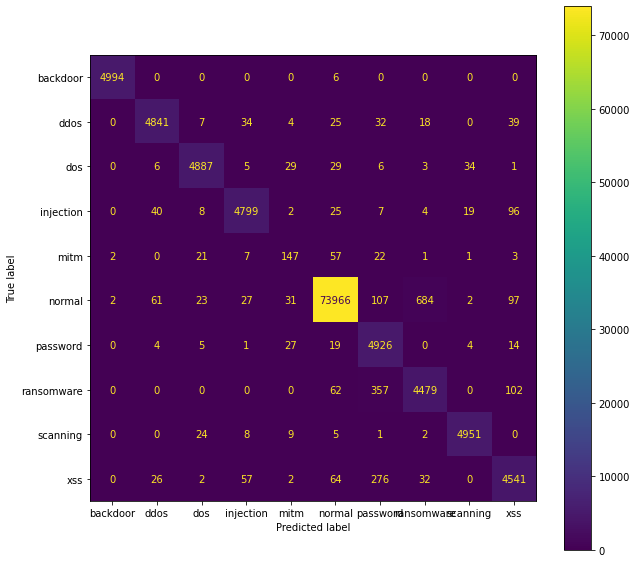

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_model.fit(scaled_X_train, y_train)
knn_y_pred = knn_model.predict(scaled_X_val)

print(evaluate_model(y_val, knn_y_pred))
plot_confusion_matrix(y_val, knn_y_pred, label)
print(classification_report(y_val, knn_y_pred))

### Support Vector Machine

In [ ]:
from sklearn import svm
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(scaled_X_val)

print(evaluate_model(y_val, y_pred_svm))
print(classification_report(y_val, y_pred_svm))
plot_confusion_matrix(y_val, y_pred_svm, label)

### Decision Tree Classifier

{'accuracy_score': 0.9805745221714196, 'precision_score': 0.9292675324839212, 'recall_score': 0.9319894406130269, 'f1_score': 0.930457464873143}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       0.97      0.96      0.97      5000
           2       0.99      0.98      0.98      5000
           3       0.97      0.96      0.97      5000
           4       0.62      0.62      0.62       261
           5       0.99      0.99      0.99     75000
           6       0.99      0.97      0.98      5000
           7       0.85      0.93      0.89      5000
           8       0.99      0.99      0.99      5000
           9       0.93      0.92      0.92      5000

    accuracy                           0.98    115261
   macro avg       0.93      0.93      0.93    115261
weighted avg       0.98      0.98      0.98    115261



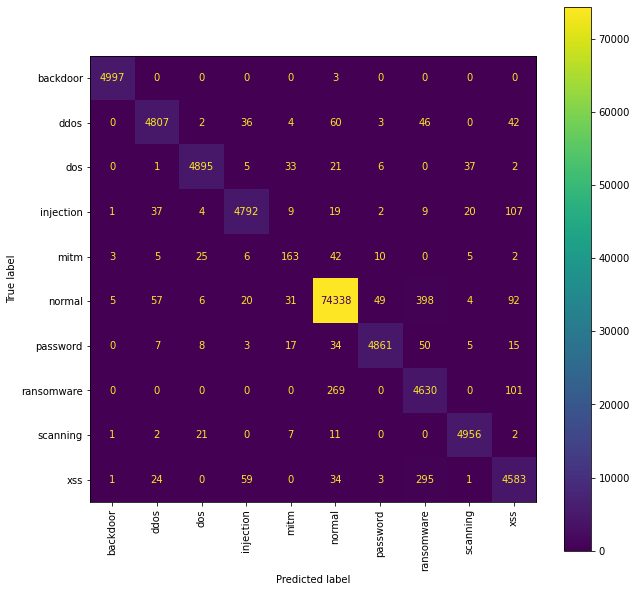

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(criterion="entropy",
                                             min_samples_split=40,
                                             random_state=0)
decision_tree_model.fit(X_train, y_train)
decision_tree_y_pred = decision_tree_model.predict(scaled_X_val)

print(evaluate_model(y_val, decision_tree_y_pred))
print(classification_report(y_val, decision_tree_y_pred))
plot_confusion_matrix(y_val, decision_tree_y_pred, label)

### Random Forest Classifier

{'accuracy_score': 0.982118843320811, 'precision_score': 0.9423070453315662, 'recall_score': 0.943321318007663, 'f1_score': 0.9426273967382505}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       0.98      0.96      0.97      5000
           2       0.99      0.98      0.99      5000
           3       0.98      0.96      0.97      5000
           4       0.72      0.72      0.72       261
           5       0.99      0.99      0.99     75000
           6       0.99      0.97      0.98      5000
           7       0.85      0.93      0.89      5000
           8       0.99      0.99      0.99      5000
           9       0.93      0.93      0.93      5000

    accuracy                           0.98    115261
   macro avg       0.94      0.94      0.94    115261
weighted avg       0.98      0.98      0.98    115261



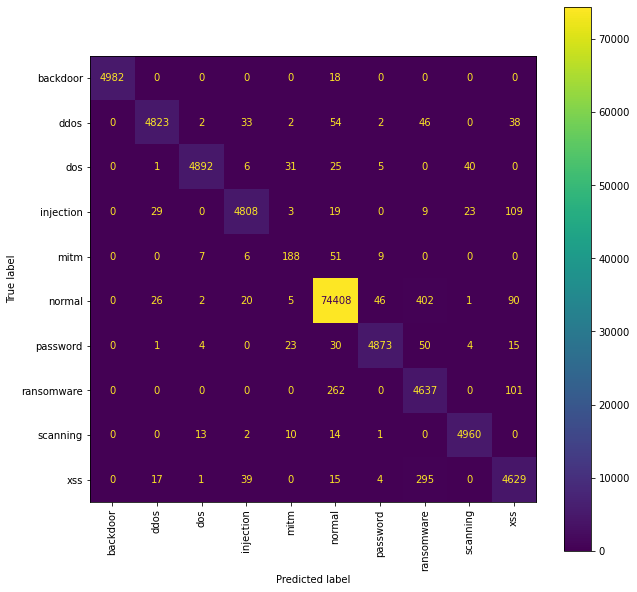

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100,
                                             criterion="entropy",
                                             min_samples_split=30,
                                             random_state=0)
random_forest_model.fit(X_train, y_train)
random_forest_y_pred = random_forest_model.predict(scaled_X_val)

print(evaluate_model(y_val, random_forest_y_pred))
print(classification_report(y_val, random_forest_y_pred))
plot_confusion_matrix(y_val, random_forest_y_pred, label)

### Naive Bayes

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy_score': 0.06437563442968566, 'precision_score': 0.24908204132329556, 'recall_score': 0.14147627586206896, 'f1_score': 0.05163697553970753}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5000
           1       0.67      0.00      0.01      5000
           2       0.02      0.00      0.00      5000
           3       0.00      0.00      0.00      5000
           4       0.26      0.03      0.06       261
           5       0.96      0.01      0.01     75000
           6       0.16      0.30      0.21      5000
           7       0.05      1.00      0.10      5000
           8       0.00      0.00      0.00      5000
           9       0.38      0.07      0.12      5000

    accuracy                           0.06    115261
   macro avg       0.25      0.14      0.05    115261
weighted avg       0.68      0.06      0.03    115261



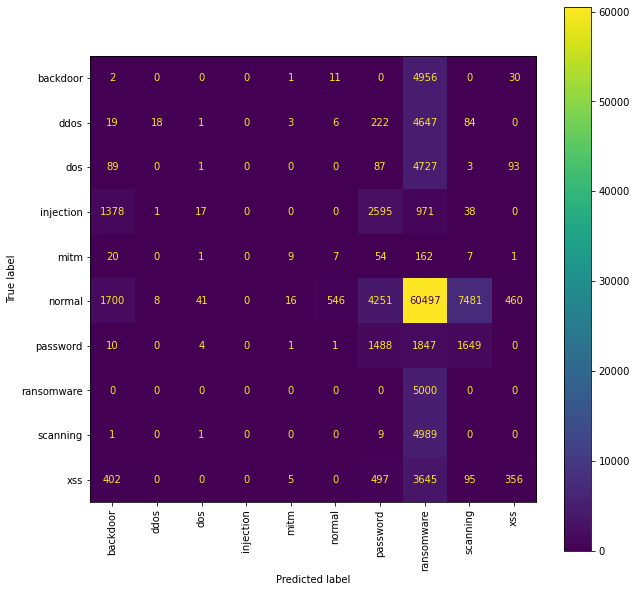

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(scaled_X_train, y_train)
y_pred_nb = naive_bayes_model.predict(scaled_X_val)

print(evaluate_model(y_val, y_pred_nb))
print(classification_report(y_val, y_pred_nb))
plot_confusion_matrix(y_val, y_pred_nb, label)

### XGBOOST

{'accuracy_score': 0.9735296414225106, 'precision_score': 0.9174756459621378, 'recall_score': 0.9135283218390804, 'f1_score': 0.9149217531709837}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       0.98      0.93      0.96      5000
           2       0.99      0.97      0.98      5000
           3       0.96      0.93      0.95      5000
           4       0.58      0.54      0.56       261
           5       0.99      0.99      0.99     75000
           6       0.98      0.97      0.98      5000
           7       0.81      0.92      0.86      5000
           8       0.98      0.99      0.98      5000
           9       0.90      0.90      0.90      5000

    accuracy                           0.97    115261
   macro avg       0.92      0.91      0.91    115261
weighted avg       0.97      0.97      0.97    115261



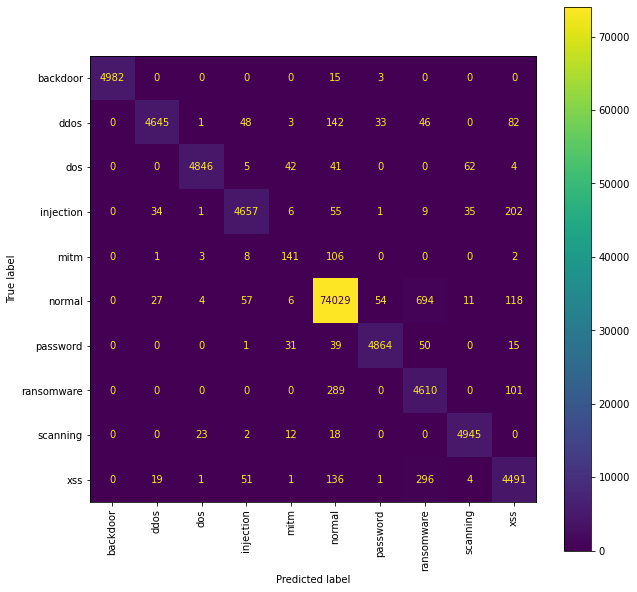

In [ ]:
from xgboost import XGBClassifier

xgboost_model = XGBClassifier()
xgboost_model.fit(scaled_X_train, y_train)
y_pred_xgb = xgboost_model.predict(scaled_X_val)

print(evaluate_model(y_val, y_pred_xgb))
print(classification_report(y_val, y_pred_xgb))
plot_confusion_matrix(y_val, y_pred_xgb, label)

### Artificial Neural Network

In [ ]:
from keras.utils import np_utils

encoded_y_train = np_utils.to_categorical(y_train)
encoded_y_val = np_utils.to_categorical(y_val)
encoded_y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
import tensorflow as tf
print(tf.__version__)

ann_model = tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann_model.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann_model.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann_model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
history = ann_model.fit(scaled_X_train, encoded_y_train, validation_split=0.25, batch_size=32, epochs=100)

2.6.0
Epoch 1/100
8105/8105 [==============================] - 56s 6ms/step - loss: 0.7033 - accuracy: 0.7466 - precision: 0.8638 - recall: 0.6358 - val_loss: 0.6169 - val_accuracy: 0.7635 - val_precision: 0.8777 - val_recall: 0.6336
Epoch 2/100
8105/8105 [==============================] - 52s 6ms/step - loss: 0.6123 - accuracy: 0.7631 - precision: 0.8598 - recall: 0.6618 - val_loss: 0.6018 - val_accuracy: 0.7640 - val_precision: 0.8611 - val_recall: 0.6670
Epoch 3/100
8105/8105 [==============================] - 51s 6ms/step - loss: 0.6034 - accuracy: 0.7643 - precision: 0.8596 - recall: 0.6648 - val_loss: 0.5983 - val_accuracy: 0.7615 - val_precision: 0.8613 - val_recall: 0.6587
Epoch 4/100
8105/8105 [==============================] - 50s 6ms/step - loss: 0.5975 - accuracy: 0.7646 - precision: 0.8594 - recall: 0.6685 - val_loss: 0.5933 - val_accuracy: 0.7595 - val_precision: 0.8604 - val_recall: 0.6618
Epoch 5/100
8105/8105 [==============================] - 50s 6ms/step - loss: 0.59

In [ ]:
ann_y_pred = ann_model.predict(scaled_X_val)
ann_y_pred = (ann_y_pred > 0.5)
ann_y_pred

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [ ]:

# Check the validation accuracy
_, accuracy, precision, recall = ann_model.evaluate(scaled_X_val, encoded_y_val)
print('Accuracy: %.2f' % (accuracy*100))

3602/3602 [==============================] - 16s 4ms/step - loss: 0.4242 - accuracy: 0.8356 - precision: 0.9130 - recall: 0.7524
Accuracy: 83.56


Text(0.5, 0, 'epoch')

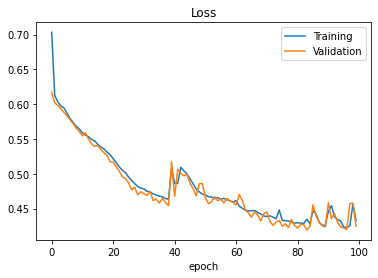

In [ ]:
# Plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

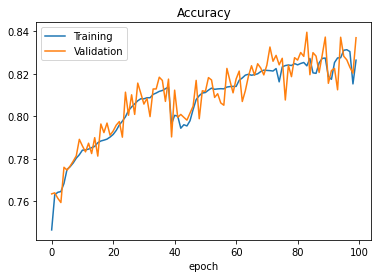

In [ ]:
# Plot graph between training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

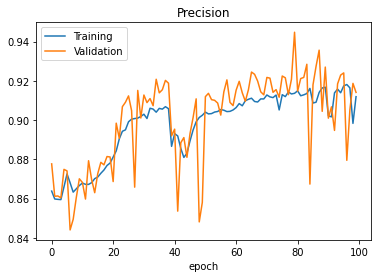

In [ ]:
# Plot graph between training and validation precision
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.legend(['Training', 'Validation'])
plt.title('Precision')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

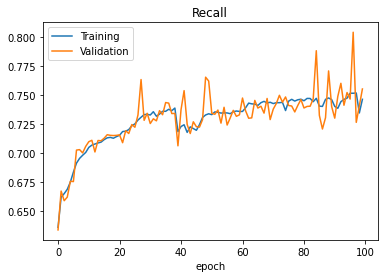

In [ ]:
# Plot graph between training and validation recall
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.legend(['Training', 'Validation'])
plt.title('Recall')
plt.xlabel('epoch')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy_score': 0.7953427438595883, 'precision_score': 0.5950905670734046, 'recall_score': 0.56224, 'f1_score': 0.5245711779361758}
              precision    recall  f1-score   support

           0       0.24      0.99      0.39      5000
           1       0.90      0.81      0.85      5000
           2       0.77      0.20      0.32      5000
           3       0.92      0.32      0.48      5000
           4       0.00      0.00      0.00       261
           5       0.97      0.91      0.94     75000
           6       0.00      0.00      0.00      5000
           7       0.78      0.88      0.83      5000
           8       0.71      0.77      0.74      5000
           9       0.66      0.74      0.70      5000

    accuracy                           0.80    115261
   macro avg       0.60      0.56      0.52    115261
weighted avg       0.84      0.80      0.80    115261



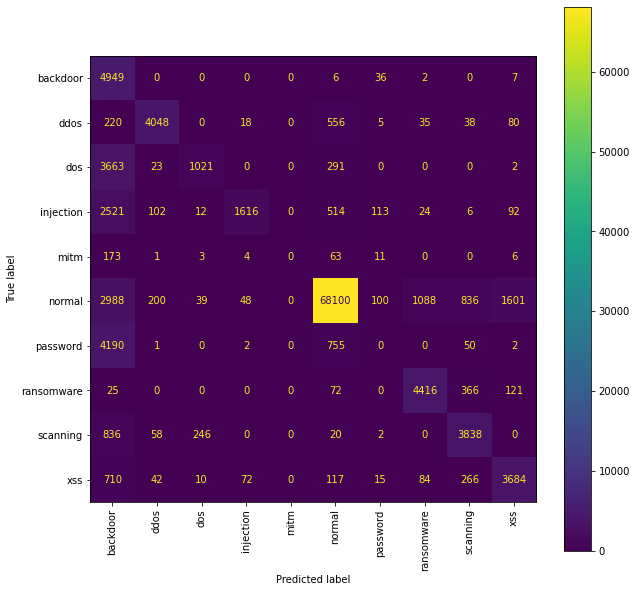

In [ ]:
print(evaluate_model(encoded_y_val.argmax(axis=1), ann_y_pred.argmax(axis=1)))
print(classification_report(encoded_y_val.argmax(axis=1), ann_y_pred.argmax(axis=1)))
plot_confusion_matrix(encoded_y_val.argmax(axis=1), ann_y_pred.argmax(axis=1), label)

## Hybrid Model

{'accuracy_score': 0.9817371010142198, 'precision_score': 0.9410593810316132, 'recall_score': 0.9432982681992337, 'f1_score': 0.941971513267484}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5000
           1       0.99      0.96      0.98      5000
           2       1.00      0.98      0.99      5000
           3       0.97      0.96      0.96      5000
           4       0.71      0.73      0.72       261
           5       0.99      0.99      0.99     75000
           6       0.99      0.97      0.98      5000
           7       0.85      0.93      0.89      5000
           8       0.99      0.99      0.99      5000
           9       0.92      0.93      0.92      5000

    accuracy                           0.98    115261
   macro avg       0.94      0.94      0.94    115261
weighted avg       0.98      0.98      0.98    115261



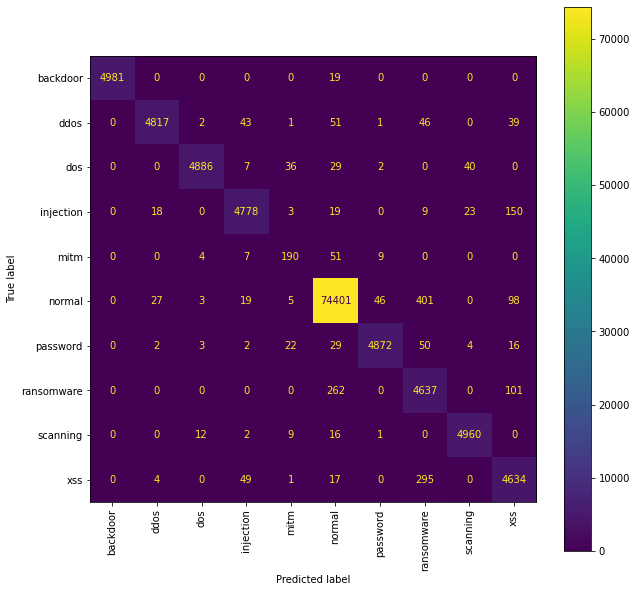

In [ ]:
# Defining Hybrid Ensemble Learning Model

from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

estimators = []

#Defining Decision Tree Classifiers
model1 = DecisionTreeClassifier(criterion='gini',
                                min_samples_split=55,
                               random_state=0)
estimators.append(('cart1', model1))
model2 = DecisionTreeClassifier(criterion='entropy',
                                min_samples_split=50,
                                random_state=0)
estimators.append(('cart3', model2))


#Defining K-NN classifiers
model3 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
estimators.append(('knn1', model3))

model4 = XGBClassifier()
estimators.append(('xgboost', model4))

model5 = RandomForestClassifier(n_estimators=100,
                                criterion="entropy",
                                min_samples_split=40,
                                random_state=0)
estimators.append(('rf1', model5))

model6 = RandomForestClassifier(n_estimators=200,
                                criterion="entropy",
                                min_samples_split=35,
                                random_state=0)
estimators.append(('rf2', model6))

# Defining the ensemble model
ensemble = VotingClassifier(estimators,
                            voting='hard',
                            weights=[1, 1, 1, 1, 1.1, 1.1])

ensemble.fit(scaled_X_train, y_train)
y_pred_hybrid = ensemble.predict(scaled_X_val)

print(evaluate_model(y_val, y_pred_hybrid))
print(classification_report(y_val, y_pred_hybrid))
plot_confusion_matrix(y_val, y_pred_hybrid, label)

# Visualize the Results

In [ ]:
# Create empty list for accuracy, precision, recall and f1-score of each ml algorithm
accuracy_score_tf = [0.767450, 0.976315, 0.64376, 0.980575, 0.982119, 0.973530, 0.795343, 0.981737]
precision_score_tf = [0.57739, 0.91399, 0.24908, 0.92927, 0.94231, 0.91748, 0.595091, 0.94106]
recall_score_tf = [0.43996, 0.92330, 0.14148, 0.93199, 0.94332, 0.91353, 0.56224, 0.94330]
f1_score_tf = [0.39360, 0.91813, 0.05164, 0.93046, 0.94263, 0.91492, 0.524571, 0.94197]

models = ["Logistic Regression", "KNN", "Naive Bayes", "Decision Tree",
          "Random Forest", "XGBoost", "ANN", "Hybrid Model"]

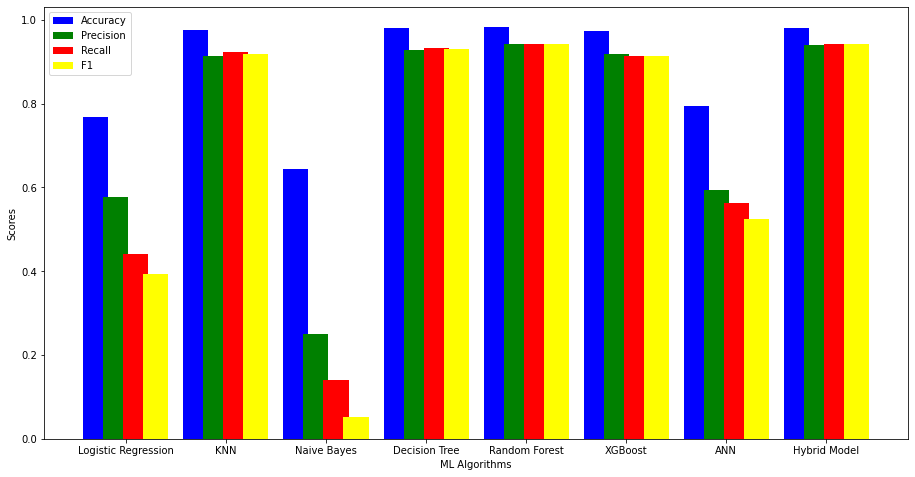

In [ ]:
X = np.arange(8)
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, accuracy_score_tf, color = 'b', width = 0.25)
ax.bar(X + 0.20, precision_score_tf, color = 'g', width = 0.25)
ax.bar(X + 0.40, recall_score_tf, color = 'r', width = 0.25)
ax.bar(X + 0.60, f1_score_tf, color = 'yellow', width = 0.25)
plt.xticks(X+0.30, models)
plt.xlabel("ML Algorithms")
plt.ylabel("Scores")
plt.legend(["Accuracy", "Precision", "Recall", "F1"])

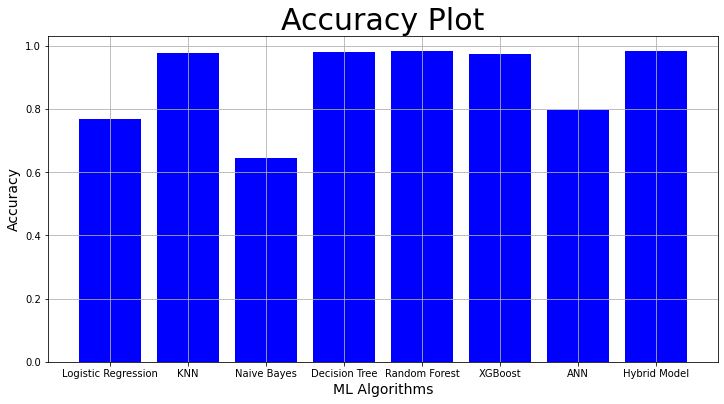

In [ ]:
# Accuracy Plot
plt.figure(figsize=(12,6))
colour = ['green', 'blue', 'orange', 'violet', 'brown', 'red', 'magenta', 'yellow']

models = ["Logistic Regression", "KNN", "Naive Bayes", "Decision Tree",
          "Random Forest", "XGBoost", "ANN", "Hybrid Model"]
ax = plt.gca()

plt.bar(models, accuracy_score_tf, color='b')
plt.title('Accuracy Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

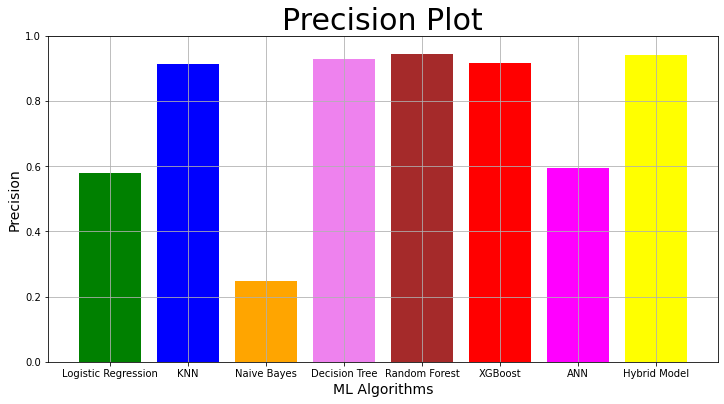

In [ ]:
# Precision Plot
plt.figure(figsize=(12,6))

ax = plt.gca()
plt.ylim(0, 1)
plt.bar(models, precision_score_tf, color=colour)
plt.title('Precision Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.grid(True)
plt.show()

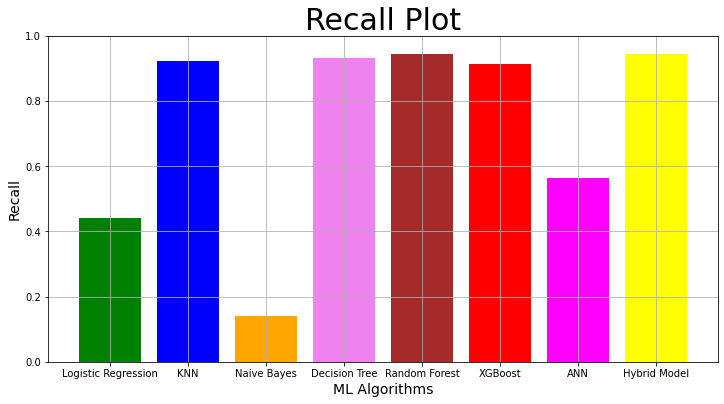

In [ ]:
# Recall Plot
plt.figure(figsize=(12,6))

ax = plt.gca()
plt.ylim(0, 1)
plt.bar(models, recall_score_tf, color=colour)
plt.title('Recall Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('Recall', fontsize=14)
plt.grid(True)
plt.show()

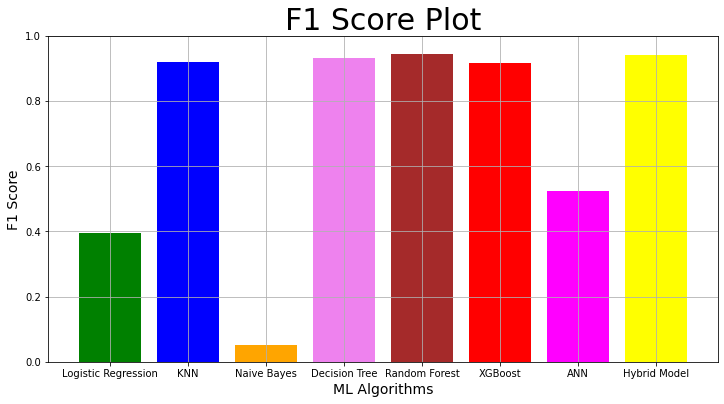

In [ ]:
# F1-Score Plot
plt.figure(figsize=(12,6))

ax = plt.gca()
plt.ylim(0, 1)
plt.bar(models, f1_score_tf, color=colour)
plt.title('F1 Score Plot', fontsize=30)
plt.xlabel('ML Algorithms', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.grid(True)
plt.show()